# Djagno 08 Authentication System 01

## Cookie & Session

### HTTP

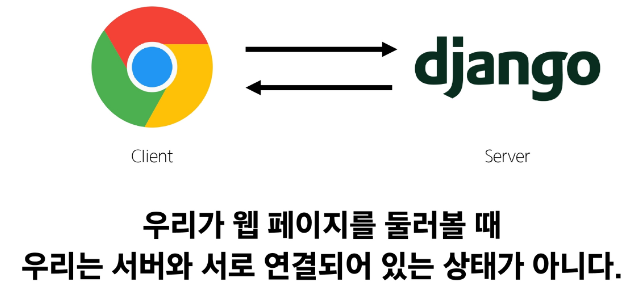

#### HTTP
HTML 문서와 같은 리소스들을 가져올 수 있도록 해주는 규약<br>
웹(WWW)에서 이루어지는 모든 데이터 교환의 기초

특징
1. 비 연결 지향(connectionless)
    - 서버는 요청에 대한 응답을 보낸 후 연결을 끊음

2. 무상태(stateless)
    - 연결을 끊는 순간 클라이언트와 서버 간의통신이 끝나며 상태 정보가 유지되지 않음

상태가 없다 = 상태 정보가 유지되지 않는다 =>
- 장바구니에 담은 상품을 유지할 수 없음
- 로그인 상태를 유지할 수 없음

=> 그러면 어떻게 해야 연결 된 것처럼 유지할 수 있을까?

### Cookie

#### 쿠키(Cookie)
1. 쿠키 및 캐시 데이터 삭제
2. 쿠키를 허용하시겠습니까?

- 서버가 사용자의 웹 브라우저에 전송하는 `작은 데이터 조각`
    - 서버가 제공하여 클라이언트 측에서 저장되는 작은 데이터 파일
    - 사용자 인증, 추적, 상태 유지 등에 사용되는 데이터 저장 방식

#### 쿠키 동작 예시
1. 브라우저가 웹 서버에 웹페이지를 요청

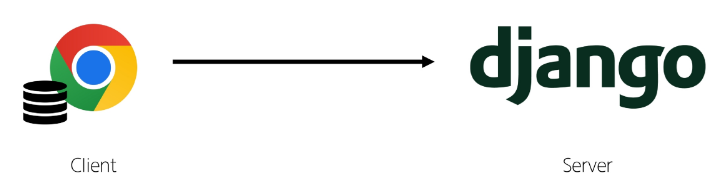

2. 웹 서버는 요청된 페이지와 함께 쿠키를 포함한 응답을 브라우저에게 전송

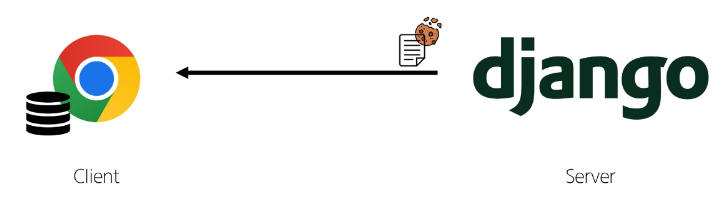

3. 브라우저는 받은 쿠키를 저장소에 저장<br>
쿠키의 속성(만료 시간, 도메인, 주소 등)도 함께 저장됨

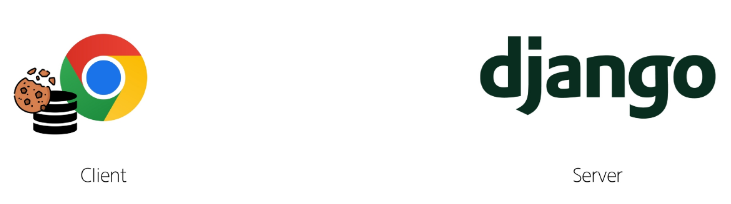

4. 이후 브라우저가 같은 웹 서버에 웹 페이지를 요청할 때, 저장된 쿠키 중 해당 요청에 적용 가능한 쿠키를 포함하여 함께 전송

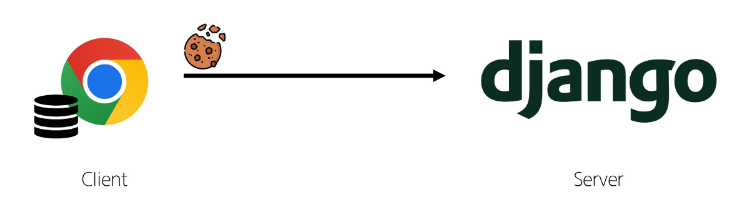

5. 웹 서버는 받은 쿠키 정보를 확인하고, 필요에 따라 사용자 식별, 세션 관리 등을 수행

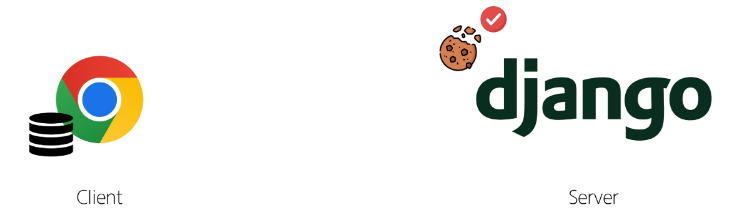

6. 웹 서버는 요청에 대한 응답을 보내며, 필요한 경우 새로운 쿠키를 설정하거나 기존 쿠키를 수정할 수 있음.

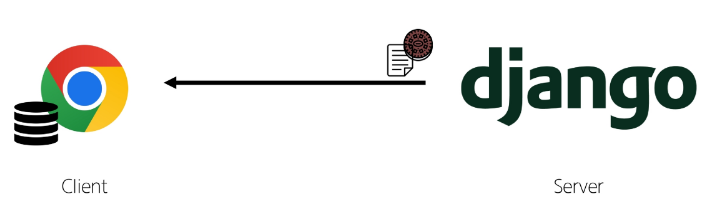

- => **요청, 응답 보낼 때 확인 용도의 데이터 조각을 주고 받는다.**

#### 쿠키를 이용한 장바구니 예시
- 복습할 때 해보기.

#### 쿠키의 작동 원리와 활용
1. 쿠키 저장 방식
    - 브라우저(클라이언트)는 쿠키를 `KEY-VALUE`의 데이터 형식으로 저장
    - 쿠키에는 이름, 값 외에도 `만료 시간, 도메인 경로 등`,의 추가 속성이 포함 됨

2. 쿠키 전송 과정
    - 서버는 HTTP 응답 헤더의 `Set-Cookie 필드`를 통해 클라이언트에게 쿠키를 전송
    - 브라우저는 <U>받은 쿠키를 저장해 두었다가</U>, <U>동일한 서버에 재요청 시</U> HTTP 요청 Header의 Cookie 필드에 저장된 쿠키를 함께 전송

3. 쿠키의 주요 용도
    - 두 요청이 동일한 브라우제 들어왔는지 아닌지를 판단할 때 주로 사용됨
    - 이를 이용해 사용자의 로그인 상태를 유지할 수 있음
    - 상태가 없는(stateless) HTTP 프로토콜에서 `상태 정보를 기억시켜주는 역할`

- **=> 서버에게 `나 로그인 된 사용자야!`라는 인증 정보가 담긴 쿠키를 매 요청바마 계속 보내는 것**

#### 쿠키 사용 목적

1. 세션 관리(Session management) : 상태 관리
    - 로그인, 아이디 자동완성, 공지 하루 안보기, 팝업 체크, 장바구니 등의 정보 관리

2. 개인화 (Personalization)
    - 사용자 선호 설정(언어 설정, 테마 등) 저장

3. 트래킹 (Traking)
    - 사용자 행동을 기록 및 분석

- 2 + 3 => 광고, 추천 등에 사용

### Session

#### 세션(Session)
- 쿠키 중에서도 상태를 관리하는 것

- 서버 측에서 생성되어 클라이언트와 서버 간의 상태를 유지, 상태 정보를 저장하는 데이터 저장 방식
- => 쿠키에 세션 데이터를 저장하여 매 요청시마다 세션 데이터를 함께 보냄

#### 세션 작동 원리
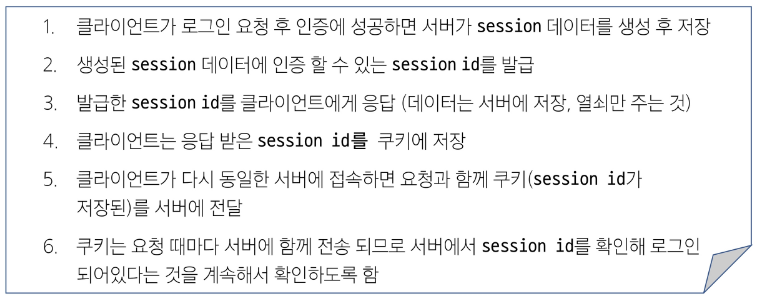

**`서버` 측에서는 세션 데이터를 생성 후 `저장`하고 이 데이터에 접근할 수 있는 `세션 ID`를 생성**

**이 ID를 `클라이언트 측으로 전달`하고 클라이언트는 `쿠키에 이 ID를 저장`**

**이후 클라이언트가 같은 서버에 재요청 시 마다 `저장해두었던 쿠키도 요청과 함께(+ 세션 ID)` 전송**

#### => 로그인 되어있다는 사실을 입증하는 데이터를 매 요청마다 계속해서 보내는 것

#### 쿠키와 세션의 목적
클라이언트와 서버 간의 상태 정보를 유지하고 사용자를 식별하기 위해 사용
- + 세션이 만료되었다. => 짧은 시간동안만 효력이 있는 듯

### Django Authentication System

#### Django Authentication System
- 사용자 인증과 관련된 기능을 모아 놓은 시스템

#### Authentication(인증)
- 사용자가 자신이 누구인지 확인하는 것(신원 확인)

#### 사전 준비
- 두 번째 app accounts 생성 및 등록
- auth와 관련한 경로나 키워드들을 django 내부적으로 accounts라는 이름으로 사용하고 있기 때문에 되도록 `accounts`로 지정하는 것을 권장
- **= 이전에 accounts로 많이 써서 그냥 accounts로 쓰는게 편하다.**

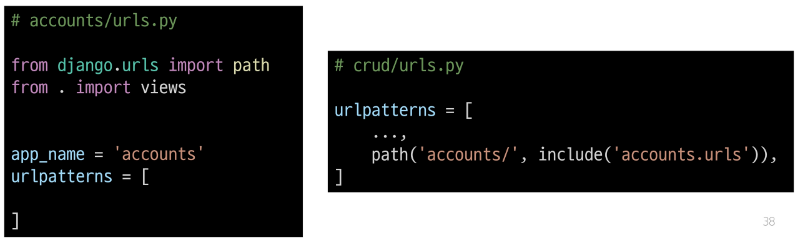

**urlpatterns가 처음에 비어있어서 안쓰는 경우가 있는데, 나중에 에러나니까 비어있어도 그냥 써라**

## Custom User model

### User model 대체하기

우리는 지금까지 존재도 모르고 user 모델을 써왔었다. ?

#### 기본 User Model의 한계
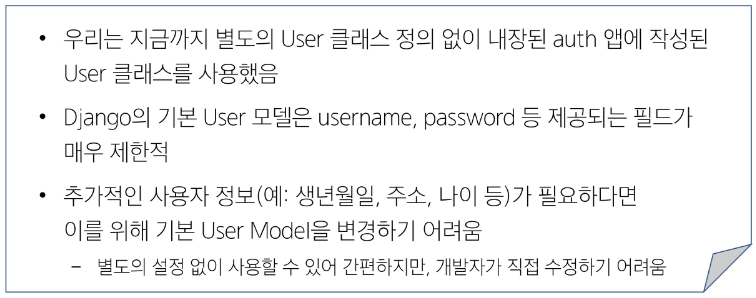

#### 내장된 auth 앱
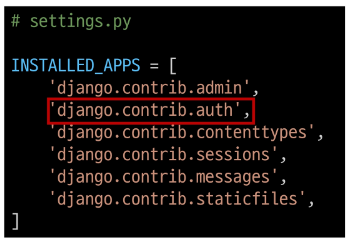

**이 안에 `AbstractUser`라는 클래스를 이용해왔었다**
- 그럼 그대로 상속받으면 되겠네 !

#### User Model의 대체 필요성
- 프로젝트의 특정 요구사항에 맞춰 사용자 모델을 확장할 수 있음
- 예를 들어 이메일을 username으로 사용하거나, 다른 추가 필드를 포함시킬 수 있음

#### Custom User Model로 대체하기
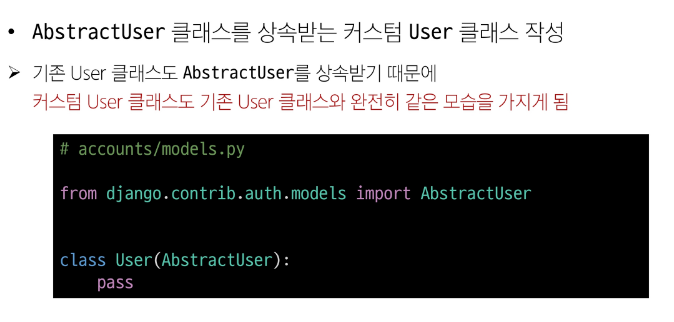

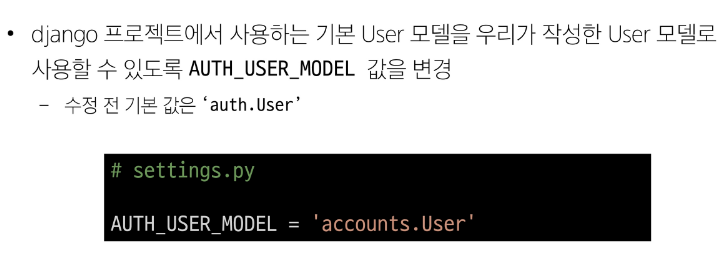

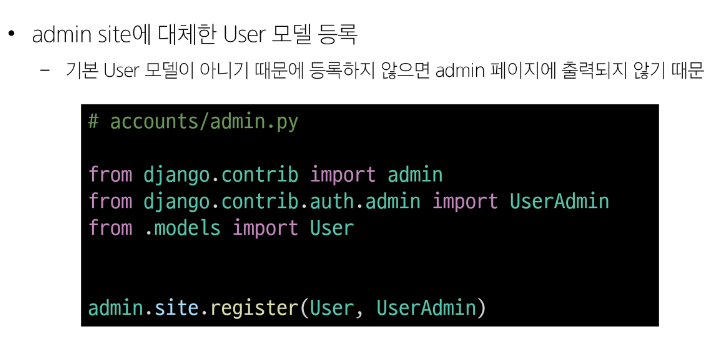

**외우는거 아님. 공식 문서에도 3단계로 나와있다.**

#### AUTH_USER_MODEL
Django 프로젝트의 User를 나타내는 데 사용하는 모델을 지정하는 속성

<h1>`주의`</h1>
**프로젝트 중간에 AUTH_USER_MODEL을 변경할 수 없음**
- 진행앴으면, 데이터베이스를 초기화 해야함. migrate 과정에서 db를 만들 때 auth_~ 들은 이후에 속성을 변경하더라도 영향을 받지 않음.

#### 프로젝트를 시작하면 반드시 User 모델을 대체해야 한다.

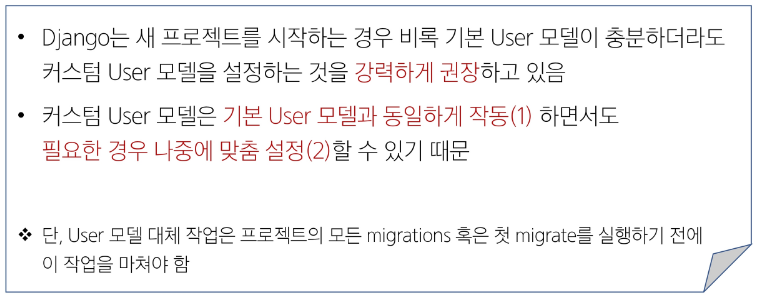

### Login

#### 로그인은 Session을 Create하는 과정

#### AuthenticationForm()
- 로그인 인증에 사용할 데이터를 입력 받는 `bulit-in form`

#### 로그인 페이지 작성
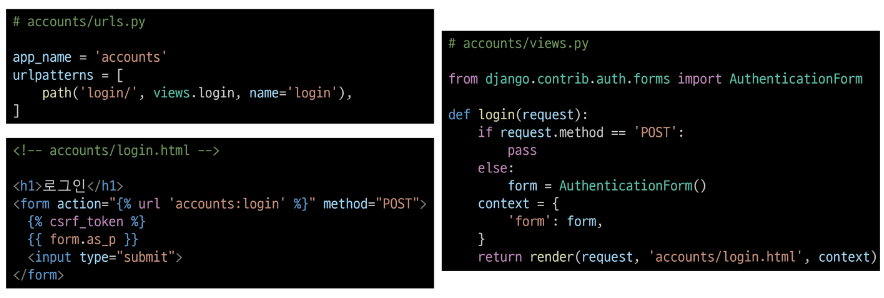

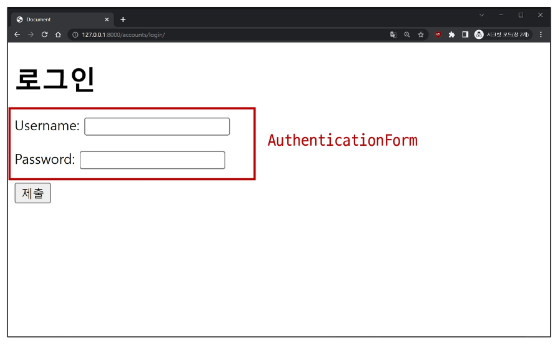

#### 로그인 로직 작성
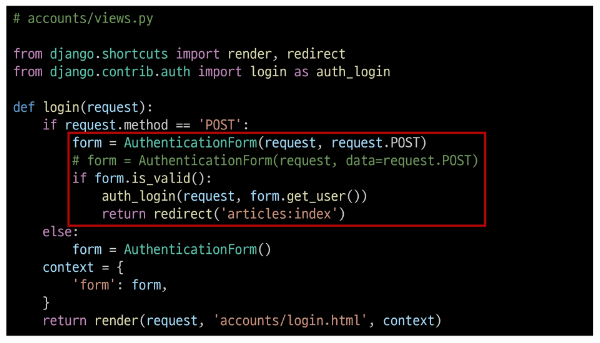

#### login(request, user)
AuthenticationForm을 통해 인증된 사용자를 로그인 하는 함수

#### get_user()
AuthenticationForm의 인스턴트 메서드
- 유효성 검사를 통과했을 경우 로그인 한 사용자 객체를 반환

#### 세션 데이터 확인하기
1. 로그인 후 발급받은 세션 확인
    - django_session 테이블에서 확인

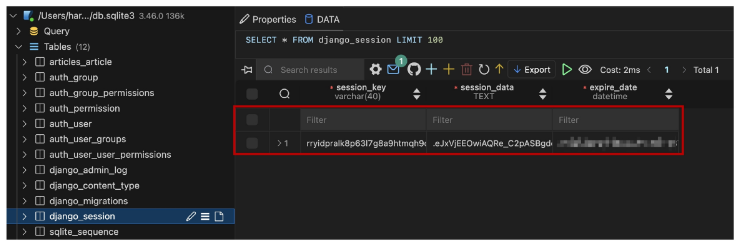

2. 브라우저에서 확인
    - 개발자도구 - Application - Cookies

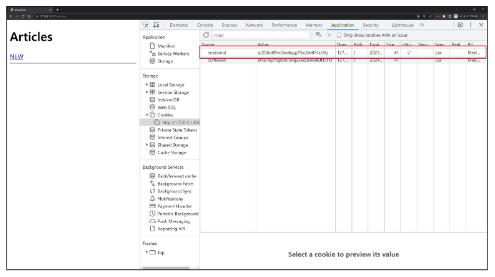

#### 로그인 링크 작성
- 메인 페이지에 로그인 페이지로 갈 수 있는 링크 작성

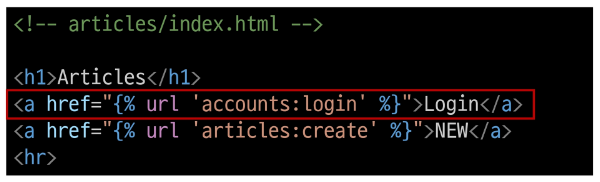

### Logout

#### 로그아웃은 Session을 Delete하는 과정

#### logout(request)
1. DB에서 현재 요청에 대한 Session Data를 삭제
2. 클라이언트에 쿠키에서도 Session ID를 삭제

#### 로그아웃 로직 작성
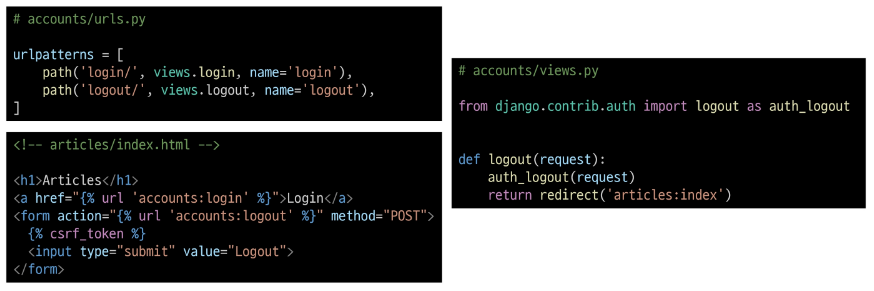

로그아웃 진행 및 세션 데이터 삭제 확인

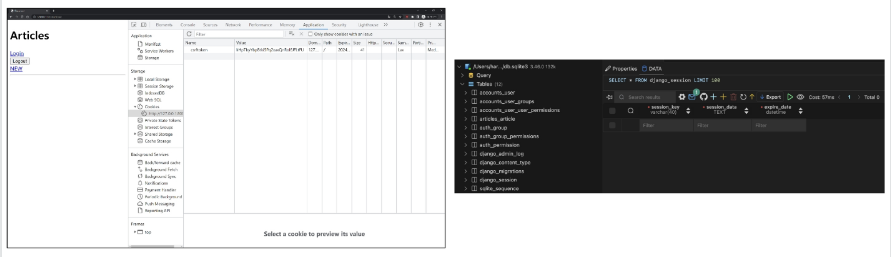

## Template with Authentication data

### 템플릿과 인증 데이터

#### Template with Authentication data
템플릿에서 인증 관련 데이터를 출력하는 방법

#### 현재 로그인 되어있는 유저 정보 출력하기
user라는 context 데이터를 사용할 수 있는 이유는?
-> django가 미리 준비한 context 데이터가 존재하기 때문(context processers)

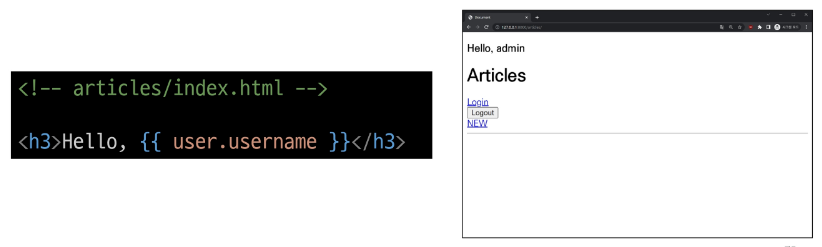

##### context processers
- 템플릿이 렌더링 될 때 호출 가능한 컨텍스트 데이터 목록
- 작성된 컨텍스트 데이터는 기본적으로 템플릿에서 사용 가능한 변수로 포함
-> django에서 자주 사용하는 데이터 목록을 미리 템플릿에 로드 해 둔 것

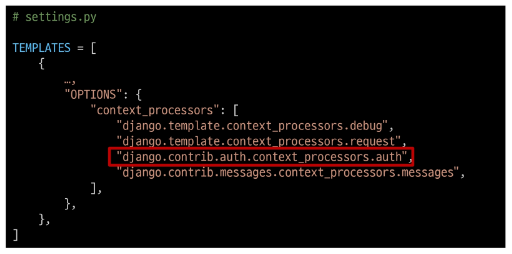

## +

### 쿠키의 수명

#### 쿠키 종류별 Lifetime (수명)
1. Session cookie
    - 현재 세션(current session)이 종료되면 삭제됨
    - 브라우저 종료와 함께 삭제됨

2. Persistent cookies
    - Expires 속성에 지정된 날짜 혹은 Max-Age 속성에 지정된 기간이 지나면 삭제됨

### 쿠키와 보안

#### 쿠키의 보안 장치
- 제한된 정보
    - 쿠키에는 보통 중요하지 않은 정보만 저장. (사용자나 ID나 세션 번호 같은 것)
- 암호화
    - 중요한 정보는 서버에서 암호화해서 쿠키에 저장
- 만료 시간
    - 쿠키에는 만료 시간을 설정 시간이 지나면 자동으로 삭제
- 도메인 제한
    - 쿠키는 특정 웹사이트에서만 사용할 수 있도록 설정할 수 있음

#### 쿠키와 개인정보 보호
- 많은 국가에서 쿠키 사용에 대한 사용자 동의를 요구하는 법규를 시행
- 웹사이트는 쿠키 정책을 명시하고, 필요한 경우 사용자의 동의를 얻어야 함

### Django에서의 세션 관리

#### 세션 in Django
- Django는 'database-backed sessions'저장 방식을 기본 값으로 사용
- session 정보는 DB의 django_session 테이블에 저장
- Django는 요청안에 특정 session id를 포함하는 쿠키를 사용해서 각각의 브라우저와 사이트가 연결된 session 데이터를 알아냄
-> Django는 우리가 session 메커니즘(복잡한 동작원리)에 대부분을 생각나지 않게끔 많은 도움을 줌

### AuthenticationForm 내부 코드
django github 코드 참고

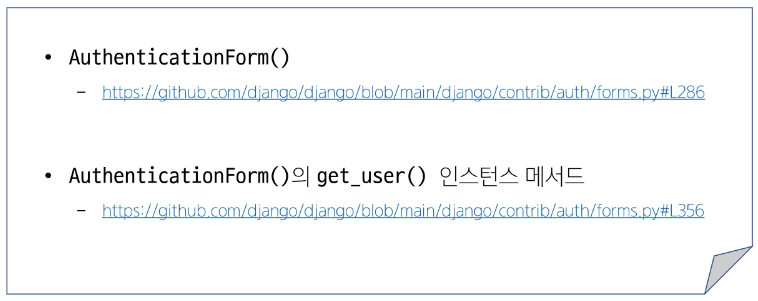

### AbstractUser class

#### `AbstractUser` class
관리자 권한과 함께 완전한 기능을 가지고 있는 User model을 구현하는 추상 기본클래스

#### Abstract base classes (추상 기본 클래스)
- 몇 가지 공통 정보를 여러 다른 모델에 넣을 때 사용하는 클래스
- 데이터베이스 테이블을 만드는 데 사용되지 않으며, 대신 다른 모델의 기본 클래스로 사용되는 경우, 해당 필드가 하위 클래스의 필드에 추가 됨

#### User 모델 상속 관계
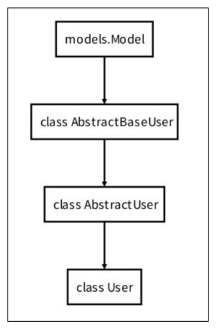

### User 모델 대체하기 Tip
- User 모델을 대체하는 순서를 숙지하기 어려울 경우, 해당 공식 문서를 보며 순서대로 진행하는 것을 권장